In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

import pickle

In [4]:
df = pd.read_csv(r"C:\Users\ponna\Downloads\large_house_price_dataset.csv")
df

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
0,3674,3,1,2,1,28,22674207
1,1360,2,2,3,2,20,8910116
2,1794,1,1,2,0,29,10412863
3,1630,1,4,3,2,7,11906611
4,1595,3,4,2,0,13,10903562
...,...,...,...,...,...,...,...
4995,3300,2,2,2,2,26,20789932
4996,771,2,4,3,1,0,6675496
4997,2322,5,4,3,2,6,17099165
4998,3485,2,2,1,0,21,21569046


In [5]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
0,3674,3,1,2,1,28,22674207
1,1360,2,2,3,2,20,8910116
2,1794,1,1,2,0,29,10412863
3,1630,1,4,3,2,7,11906611
4,1595,3,4,2,0,13,10903562


In [6]:
df.shape

(5000, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area       5000 non-null   int64
 1   Bedrooms   5000 non-null   int64
 2   Bathrooms  5000 non-null   int64
 3   Floors     5000 non-null   int64
 4   Parking    5000 non-null   int64
 5   Age        5000 non-null   int64
 6   Price      5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [8]:
df.describe()

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2272.444600,2.985000,2.494000,2.001600,1.001000,14.422200,1.510591e+07
std,1005.817287,1.412648,1.130584,0.813222,0.812608,8.619884,6.087296e+06
min,500.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.148928e+06
25%,1413.750000,2.000000,1.000000,1.000000,0.000000,7.000000,9.938504e+06
50%,2287.000000,3.000000,3.000000,2.000000,1.000000,15.000000,1.521962e+07
75%,3145.000000,4.000000,4.000000,3.000000,2.000000,22.000000,2.033671e+07
max,3999.000000,5.000000,4.000000,3.000000,2.000000,29.000000,2.750898e+07


In [9]:
df.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
Parking      0
Age          0
Price        0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(inplace=True)

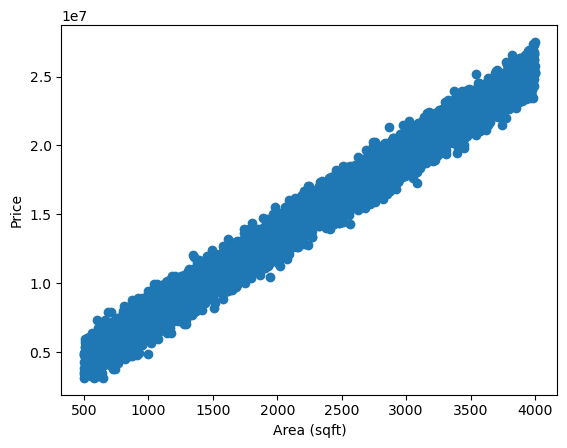

In [12]:
plt.scatter(df['Area'], df['Price'])
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.show()

In [13]:
X = df[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'Parking', 'Age' ]]
y = df['Price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [24]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [25]:
print("Train R2:" ,r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train R2: 0.997723882726607
Test R2: 0.9977531424848898


In [26]:
mae= mean_absolute_error(y_test,y_test_pred)
mse= mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)

print("MAE :" ,mae)
print("MSE :" ,mse)
print("RMSE :" ,rmse)

MAE : 246078.81638888735
MSE : 80940652032.0376
RMSE : 284500.7065580639


In [27]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge R2:" , r2_score(y_test,ridge_pred))

Ridge R2: 0.9977530845924982


In [29]:
X_train.shape

(4000, 6)

In [30]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso_pred = ridge.predict(X_test)
print("Lasso R2:" , r2_score(y_test,lasso_pred))

Lasso R2: 0.9977530845924982


In [31]:
models = {
       "Linear": r2_score(y_test,y_test_pred),
       "Ridge": r2_score(y_test,ridge_pred),
       "Lasso": r2_score(y_test,lasso_pred),
}
models

{'Linear': 0.9977531424848898,
 'Ridge': 0.9977530845924982,
 'Lasso': 0.9977530845924982}

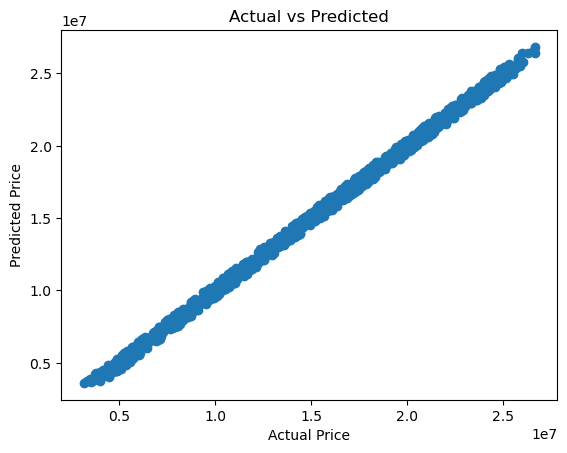

In [33]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [46]:
with open("model.pkl", "wb") as file:
    pickle.dump(ridge, file)
print("model saved successfully")

model saved successfully
